In [4]:
import os
import torch
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split

# Configuration
image_dir = 'D:\database_lab\Deepfake-AI-SUTD\processed_dataset_frame'  # Update this path
batch_size = 8

# Define the image transformations
im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize((im_size, im_size)),  # Resize all images to a fixed size
    transforms.ToTensor(),                  # Convert images to PyTorch tensors
    transforms.Normalize(mean, std)         # Normalize the tensor images
])

def load_image(filepath):
    with Image.open(filepath) as img:
        return transform(img)

def prepare_data(root_dir):
    data, labels = [], []
    categories = {'real': 1, 'fake': 0}

    for category in ['real', 'fake']:
        dir_path = os.path.join(root_dir, category)
        video_dict = {}

        # Collect files by the first four digits of their names
        for file in os.listdir(dir_path):
            if file.endswith('.jpg'):
                video_id = file[:4]  # The first four digits of the filename
                if video_id not in video_dict:
                    video_dict[video_id] = []
                video_dict[video_id].append(os.path.join(dir_path, file))

        # Sort files, load images, and store sequences
        for video_id, video_files in video_dict.items():
            try:
                sorted_files = sorted(
                    video_files,
                    key=lambda x: int(os.path.basename(x).split('_frame')[1].split('.jpg')[0])
                )
            except ValueError as e:
                print(f"Error parsing file name from: {x}")
                continue  # Skip this file or handle it according to your policy

            loaded_images = [load_image(fp) for fp in sorted_files]
            data.append(torch.stack(loaded_images))
            labels.append(categories[category])

            # Print example sequence details
            print(f"Sequence ID: {video_id}")
            print(f"Category: {category}")
            print(f"Number of Frames: {len(sorted_files)}")
            print(f"Sample Frames: {sorted_files[:5]}")  # Print first 5 frame filenames for checking

    # Convert labels to tensor
    Y = torch.tensor(labels)
    
    # Split into train and test sets
    return train_test_split(data, Y, test_size=0.2)

# Usage
X_train, X_test, y_train, y_test = prepare_data(image_dir)


<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\14504\AppData\Local\Temp\ipykernel_26620\2625709753.py:8: SyntaxWarning: invalid escape sequence '\d'
  image_dir = 'D:\database_lab\Deepfake-AI-SUTD\processed_dataset_frame'  # Update this path


Sequence ID: 4000
Category: real
Number of Frames: 5
Sample Frames: ['D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4000.mp4_frame0.jpg', 'D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4000.mp4_frame60.jpg', 'D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4000.mp4_frame120.jpg', 'D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4000.mp4_frame180.jpg', 'D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4000.mp4_frame240.jpg']
Sequence ID: 4001
Category: real
Number of Frames: 5
Sample Frames: ['D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4001.mp4_frame0.jpg', 'D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4001.mp4_frame60.jpg', 'D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4001.mp4_frame120.jpg', 'D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4001.mp4_frame180.jpg', 'D:\\database_lab\\Deepfake-AI-SUTD\\pro

In [7]:
import csv
import os
import torch
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset

# Define image transformations
im_size = 112
transform = transforms.Compose([
    transforms.Resize((im_size, im_size)),  # Resize all images to a fixed size
    transforms.ToTensor(),                  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def load_image(filepath):
    with Image.open(filepath) as img:
        return transform(img)

def prepare_data(root_dir, csv_path):
    sequences, labels, metadata = [], [], []
    categories = {'real': 1, 'fake': 0}

    # Open a CSV file to save the metadata
    with open(csv_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['sequence_id', 'category', 'frame_count', 'sample_frames'])

        for category in ['real', 'fake']:
            dir_path = os.path.join(root_dir, category)
            video_dict = {}

            # Collect files by the first four digits of their names
            for file in os.listdir(dir_path):
                if file.endswith('.jpg'):
                    video_id = file[:4]  # The first four digits of the filename
                    if video_id not in video_dict:
                        video_dict[video_id] = []
                    video_dict[video_id].append(os.path.join(dir_path, file))

            # Sort files, load images, and store sequences
            for video_id, video_files in video_dict.items():
                try:
                    sorted_files = sorted(
                        video_files,
                        key=lambda x: int(os.path.basename(x).split('_frame')[1].split('.jpg')[0])
                    )
                except ValueError as e:
                    print(f"Error parsing file name from: {x}")
                    continue  # Skip this file or handle it according to your policy

                loaded_images = [load_image(fp) for fp in sorted_files]
                sequences.append(torch.stack(loaded_images))
                labels.append(categories[category])
                metadata_entry = {
                    'sequence_id': video_id,
                    'category': category,
                    'frame_count': len(sorted_files),
                    'sample_frames': '; '.join(sorted_files[:5])
                }
                metadata.append(metadata_entry)

                # Write to CSV
                writer.writerow([video_id, category, len(sorted_files), '; '.join(sorted_files[:5])])

                # Optionally print the metadata for verification
                print(metadata_entry)

    return sequences, labels, metadata

# Usage: Specify the path where you want to save the CSV
sequences, labels, metadata = prepare_data('D:\database_lab\Deepfake-AI-SUTD\processed_dataset_frame', 'metadata.csv')


<>:73: SyntaxWarning: invalid escape sequence '\d'
<>:73: SyntaxWarning: invalid escape sequence '\d'
C:\Users\14504\AppData\Local\Temp\ipykernel_26620\2672521638.py:73: SyntaxWarning: invalid escape sequence '\d'
  sequences, labels, metadata = prepare_data('D:\database_lab\Deepfake-AI-SUTD\processed_dataset_frame', 'metadata.csv')


{'sequence_id': '4000', 'category': 'real', 'frame_count': 5, 'sample_frames': 'D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4000.mp4_frame0.jpg; D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4000.mp4_frame60.jpg; D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4000.mp4_frame120.jpg; D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4000.mp4_frame180.jpg; D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4000.mp4_frame240.jpg'}
{'sequence_id': '4001', 'category': 'real', 'frame_count': 5, 'sample_frames': 'D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4001.mp4_frame0.jpg; D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4001.mp4_frame60.jpg; D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4001.mp4_frame120.jpg; D:\\database_lab\\Deepfake-AI-SUTD\\processed_dataset_frame\\real\\4001.mp4_frame180.jpg; D:\\database_lab\\Deepfake-AI-SUTD\

In [16]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import pandas as pd
from PIL import Image
import os
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torchvision.models import resnext50_32x4d, ResNeXt50_32X4D_Weights

import torch
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
import numpy as np
class CNN_for_DeepFake(nn.Module):
    def __init__(self, dropout_rate=0.5, fc_units=1024):
        super(CNN_for_DeepFake, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.act1 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(dropout_rate)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        # Adjust the output size of fc1 to match the input size for LSTM
        self.fc1 = nn.Linear(64 * 56 * 56, fc_units)  # Adjust this based on your actual input size
        self.fc2 = nn.Linear(fc_units, fc_units)  # Output the same size as the LSTM input
        self.dropout3 = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.pool(x)
        x = self.dropout1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.act2(x)
        x = self.pool(x)
        x = self.dropout2(x)

        x = x.view(x.size(0), -1)  # Flatten the features for the fully connected layer
        x = self.fc1(x)
        x = self.dropout3(x)
        x = self.fc2(x)
        return x


class SequenceModel(nn.Module):
    def __init__(self, num_classes, dropout_rate=0.5, fc_units=1024):
        super(SequenceModel, self).__init__()
        self.cnn = CNN_for_DeepFake(dropout_rate, fc_units)
        self.lstm = nn.LSTM(fc_units, 512, num_layers=1, batch_first=True)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x, lengths):
        batch_size, timesteps, C, H, W = x.size()
        c_in = x.view(batch_size * timesteps, C, H, W)
        c_out = self.cnn(c_in)
        r_in = c_out.view(batch_size, timesteps, -1)
        packed_input = pack_padded_sequence(r_in, lengths, batch_first=True, enforce_sorted=False)
        packed_output, _ = self.lstm(packed_input)
        r_out, _ = pad_packed_sequence(packed_output, batch_first=True)
        r_out = r_out[:, -1, :]  # Get the last timestep outputs
        output = self.fc(r_out)
        return output

def collate_fn(batch):
    sequences, labels, lengths = zip(*batch)
    sequences = [torch.stack(seq) for seq in sequences]  # Stack each sequence to make 3D tensor
    sequences_padded = pad_sequence(sequences, batch_first=True, padding_value=0)
    labels = torch.tensor(labels)
    lengths = torch.tensor(lengths)
    return sequences_padded, labels, lengths

class FrameSequenceDataset(Dataset):
    def __init__(self, csv_file, transform=None, indices=None):
        self.data = pd.read_csv(csv_file)
        if indices is not None:
            self.data = self.data.iloc[indices]
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        row = self.data.iloc[index]
        frames = row['sample_frames'].split('; ')
        sequence = [self.load_frame(frame) for frame in frames if self.transform is not None]
        label = int(row['category'] == 'real')
        return sequence, label, len(sequence)

    def load_frame(self, frame_path):
        img = Image.open(frame_path).convert('RGB')
        if self.transform:
            img = self.transform(img)
        return img



# Initialize the Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SequenceModel(num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device, checkpoint_path='best_model.pth'):
    best_val_loss = float('inf')  # Initialize the best validation loss to infinity

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        correct = 0
        total = 0

        for inputs, labels, lengths in train_loader:
            inputs, labels, lengths = inputs.to(device), labels.to(device), lengths.to(device)
            optimizer.zero_grad()
            outputs = model(inputs, lengths)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total

        # Validate after every epoch
        val_loss, val_accuracy = validate_model(model, val_loader, criterion, device)
        
        # Print training and validation results
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy*100:.2f}%')

        # Check if the current validation loss is the best we've seen so far
        if val_loss < best_val_loss:
            print(f'Validation loss decreased ({best_val_loss:.6f} --> {val_loss:.6f}). Saving model ...')
            best_val_loss = val_loss
            # Save model state dictionary
            torch.save(model.state_dict(), checkpoint_path)

def validate_model(model, loader, criterion, device):
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels, lengths in loader:
            inputs, labels, lengths = inputs.to(device), labels.to(device), lengths.to(device)
            outputs = model(inputs, lengths)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = correct / total
    return val_loss / len(loader), val_accuracy

# Example usage:
data_indices = np.arange(len(pd.read_csv('metadata.csv')))
np.random.shuffle(data_indices)
split = int(0.8 * len(data_indices))  # 80% for training, 20% for validation

train_indices = data_indices[:split]
val_indices = data_indices[split:]


# Prepare Dataset and DataLoader
train_dataset = FrameSequenceDataset('metadata.csv', transform=transform, indices=train_indices)
val_dataset = FrameSequenceDataset('metadata.csv', transform=transform, indices=val_indices)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

# Initialize the Model and Set Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SequenceModel(num_classes=2).to(device)

# Setup Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Path to save the best model
checkpoint_path = 'best_model.pth'

# Start Training
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device=device, checkpoint_path=checkpoint_path)




Epoch 1/10, Train Loss: 0.7121, Train Acc: 48.58%, Val Loss: 0.7876, Val Acc: 49.33%
Validation loss decreased (inf --> 0.787623). Saving model ...
Epoch 2/10, Train Loss: 0.7073, Train Acc: 51.28%, Val Loss: 0.6945, Val Acc: 49.33%
Validation loss decreased (0.787623 --> 0.694489). Saving model ...
Epoch 3/10, Train Loss: 0.7080, Train Acc: 49.53%, Val Loss: 0.7114, Val Acc: 50.40%
Epoch 4/10, Train Loss: 0.7036, Train Acc: 50.27%, Val Loss: 0.6942, Val Acc: 50.40%
Validation loss decreased (0.694489 --> 0.694221). Saving model ...
Epoch 5/10, Train Loss: 0.7177, Train Acc: 49.39%, Val Loss: 0.6941, Val Acc: 50.40%
Validation loss decreased (0.694221 --> 0.694146). Saving model ...
Epoch 6/10, Train Loss: 0.7128, Train Acc: 49.80%, Val Loss: 0.6970, Val Acc: 50.40%
Epoch 7/10, Train Loss: 0.7063, Train Acc: 51.62%, Val Loss: 0.6933, Val Acc: 49.33%
Validation loss decreased (0.694146 --> 0.693318). Saving model ...
Epoch 8/10, Train Loss: 0.7147, Train Acc: 48.38%, Val Loss: 0.6985, V

In [21]:
import os

# Function to save the checkpoint
def save_model(model, optimizer, val_loss, checkpoint_path, best_val_loss):
    print(f'Validation loss decreased ({best_val_loss:.6f} --> {val_loss:.6f}). Saving model ...')
    checkpoint_data = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_val_loss': val_loss
    }
    torch.save(checkpoint_data, checkpoint_path)
    print(f"Model saved with keys: {list(checkpoint_data.keys())}")
    return val_loss

# Function to load the model if it exists
def load_model(model, optimizer, checkpoint_path):
    if os.path.isfile(checkpoint_path):
        print(f"Loading checkpoint '{checkpoint_path}'")
        checkpoint = torch.load(checkpoint_path)
        if 'model_state_dict' in checkpoint and 'optimizer_state_dict' in checkpoint and 'best_val_loss' in checkpoint:
            model.load_state_dict(checkpoint['model_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            best_val_loss = checkpoint['best_val_loss']
            print(f"Loaded checkpoint '{checkpoint_path}' with best val loss {best_val_loss}")
            return best_val_loss
        else:
            print("Checkpoint found, but missing some keys. Starting from scratch.")
            return float('inf')
    else:
        print("No checkpoint found, starting from scratch")
        return float('inf')


# Make sure to use these updated functions in your training script


def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device, checkpoint_path='best_model.pth'):
    best_val_loss = load_model(model, optimizer, checkpoint_path)  # Load model if exists

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        correct = 0
        total = 0

        for inputs, labels, lengths in train_loader:
            inputs, labels, lengths = inputs.to(device), labels.to(device), lengths.to(device)
            optimizer.zero_grad()
            outputs = model(inputs, lengths)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        val_loss, val_accuracy = validate_model(model, val_loader, criterion, device)
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy*100:.2f}%')

        if val_loss < best_val_loss:
            best_val_loss = save_model(model, optimizer, val_loss, checkpoint_path, best_val_loss)



def check_checkpoint_contents(checkpoint_path):
    if os.path.isfile(checkpoint_path):
        checkpoint = torch.load(checkpoint_path)
        print("Checkpoint keys:", list(checkpoint.keys()))
    else:
        print("No checkpoint file found.")

# Call this function to inspect the checkpoint file
check_checkpoint_contents('best_model.pth')



# Start or resume training
# Check if the checkpoint needs to be cleared
# os.remove('best_model.pth')  # Uncomment this line if you want to delete the existing checkpoint

# Initialize and train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SequenceModel(num_classes=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
checkpoint_path = 'best_model.pth'

train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device=device, checkpoint_path=checkpoint_path)



Checkpoint keys: ['cnn.conv1.weight', 'cnn.conv1.bias', 'cnn.bn1.weight', 'cnn.bn1.bias', 'cnn.bn1.running_mean', 'cnn.bn1.running_var', 'cnn.bn1.num_batches_tracked', 'cnn.conv2.weight', 'cnn.conv2.bias', 'cnn.bn2.weight', 'cnn.bn2.bias', 'cnn.bn2.running_mean', 'cnn.bn2.running_var', 'cnn.bn2.num_batches_tracked', 'cnn.fc1.weight', 'cnn.fc1.bias', 'cnn.fc2.weight', 'cnn.fc2.bias', 'lstm.weight_ih_l0', 'lstm.weight_hh_l0', 'lstm.bias_ih_l0', 'lstm.bias_hh_l0', 'fc.weight', 'fc.bias']
Loading checkpoint 'best_model.pth'
Checkpoint found, but missing some keys. Starting from scratch.
Epoch 1/10, Train Loss: 0.7044, Train Acc: 50.47%, Val Loss: 0.7238, Val Acc: 49.60%
Validation loss decreased (inf --> 0.723825). Saving model ...
Model saved with keys: ['model_state_dict', 'optimizer_state_dict', 'best_val_loss']
Epoch 2/10, Train Loss: 0.7020, Train Acc: 53.37%, Val Loss: 0.7119, Val Acc: 50.67%
Validation loss decreased (0.723825 --> 0.711949). Saving model ...
Model saved with keys: [

In [ ]:
class FrameSequenceTestDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        # Load all samples
        for label in ['real', 'fake']:
            directory = os.path.join(root_dir, label)
            for filename in os.listdir(directory):
                if filename.endswith(".jpg"):
                    frame_path = os.path.join(directory, filename)
                    self.samples.append((frame_path, int(label == 'real')))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, index):
        frame_path, label = self.samples[index]
        image = Image.open(frame_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label


In [ ]:
import os

# Function to save the checkpoint
def save_model(model, optimizer, val_loss, checkpoint_path, best_val_loss):
    print(f'Validation loss decreased ({best_val_loss:.6f} --> {val_loss:.6f}). Saving model ...')
    checkpoint_data = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_val_loss': val_loss
    }
    torch.save(checkpoint_data, checkpoint_path)
    print(f"Model saved with keys: {list(checkpoint_data.keys())}")
    return val_loss

# Function to load the model if it exists
def load_model(model, optimizer, checkpoint_path):
    if os.path.isfile(checkpoint_path):
        print(f"Loading checkpoint '{checkpoint_path}'")
        checkpoint = torch.load(checkpoint_path)
        if 'model_state_dict' in checkpoint and 'optimizer_state_dict' in checkpoint and 'best_val_loss' in checkpoint:
            model.load_state_dict(checkpoint['model_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            best_val_loss = checkpoint['best_val_loss']
            print(f"Loaded checkpoint '{checkpoint_path}' with best val loss {best_val_loss}")
            return best_val_loss
        else:
            print("Checkpoint found, but missing some keys. Starting from scratch.")
            return float('inf')
    else:
        print("No checkpoint found, starting from scratch")
        return float('inf')


# Make sure to use these updated functions in your training script


def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device, checkpoint_path='best_model.pth'):
    best_val_loss = load_model(model, optimizer, checkpoint_path)  # Load model if exists

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        correct = 0
        total = 0

        for inputs, labels, lengths in train_loader:
            inputs, labels, lengths = inputs.to(device), labels.to(device), lengths.to(device)
            optimizer.zero_grad()
            outputs = model(inputs, lengths)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        val_loss, val_accuracy = validate_model(model, val_loader, criterion, device)
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader):.4f}, Train Acc: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy*100:.2f}%')

        if val_loss < best_val_loss:
            best_val_loss = save_model(model, optimizer, val_loss, checkpoint_path, best_val_loss)



def check_checkpoint_contents(checkpoint_path):
    if os.path.isfile(checkpoint_path):
        checkpoint = torch.load(checkpoint_path)
        print("Checkpoint keys:", list(checkpoint.keys()))
    else:
        print("No checkpoint file found.")

# Call this function to inspect the checkpoint file
check_checkpoint_contents('best_model.pth')



# Start or resume training
# Check if the checkpoint needs to be cleared
# os.remove('best_model.pth')  # Uncomment this line if you want to delete the existing checkpoint

# Initialize and train the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SequenceModel(num_classes=2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
checkpoint_path = 'best_model.pth'

train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10, device=device, checkpoint_path=checkpoint_path)



Checkpoint keys: ['cnn.conv1.weight', 'cnn.conv1.bias', 'cnn.bn1.weight', 'cnn.bn1.bias', 'cnn.bn1.running_mean', 'cnn.bn1.running_var', 'cnn.bn1.num_batches_tracked', 'cnn.conv2.weight', 'cnn.conv2.bias', 'cnn.bn2.weight', 'cnn.bn2.bias', 'cnn.bn2.running_mean', 'cnn.bn2.running_var', 'cnn.bn2.num_batches_tracked', 'cnn.fc1.weight', 'cnn.fc1.bias', 'cnn.fc2.weight', 'cnn.fc2.bias', 'lstm.weight_ih_l0', 'lstm.weight_hh_l0', 'lstm.bias_ih_l0', 'lstm.bias_hh_l0', 'fc.weight', 'fc.bias']
Loading checkpoint 'best_model.pth'
Checkpoint found, but missing some keys. Starting from scratch.
Epoch 1/10, Train Loss: 0.7044, Train Acc: 50.47%, Val Loss: 0.7238, Val Acc: 49.60%
Validation loss decreased (inf --> 0.723825). Saving model ...
Model saved with keys: ['model_state_dict', 'optimizer_state_dict', 'best_val_loss']
Epoch 2/10, Train Loss: 0.7020, Train Acc: 53.37%, Val Loss: 0.7119, Val Acc: 50.67%
Validation loss decreased (0.723825 --> 0.711949). Saving model ...
Model saved with keys: [

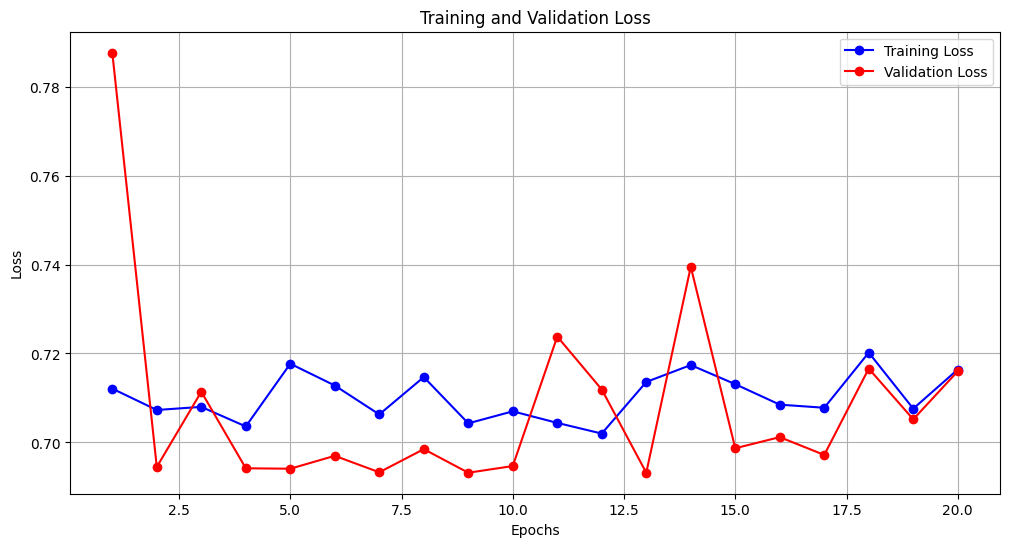

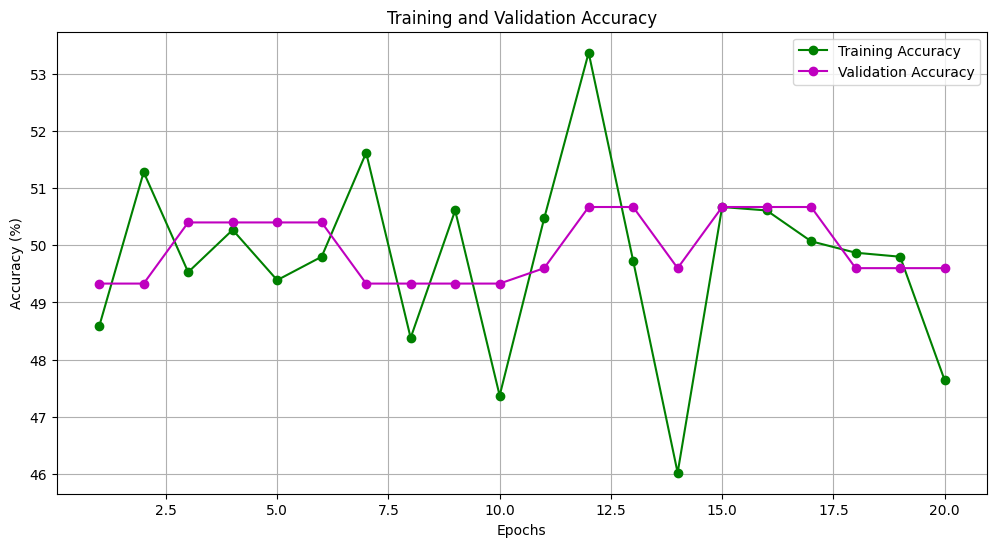

In [23]:
import matplotlib.pyplot as plt

# Training and validation losses from your provided data
train_losses = [0.7121, 0.7073, 0.7080, 0.7036, 0.7177, 0.7128, 0.7063, 0.7147, 0.7043, 0.7070,
                0.7044, 0.7020, 0.7136, 0.7174, 0.7131, 0.7085, 0.7078, 0.7202, 0.7076, 0.7164]
val_losses = [0.7876, 0.6945, 0.7114, 0.6942, 0.6941, 0.6970, 0.6933, 0.6985, 0.6932, 0.6947,
              0.7238, 0.7119, 0.6932, 0.7395, 0.6987, 0.7012, 0.6972, 0.7166, 0.7052, 0.7160]

# Training and validation accuracies from your provided data
train_accuracies = [48.58, 51.28, 49.53, 50.27, 49.39, 49.80, 51.62, 48.38, 50.61, 47.37,
                    50.47, 53.37, 49.73, 46.02, 50.67, 50.61, 50.07, 49.87, 49.80, 47.64]
val_accuracies = [49.33, 49.33, 50.40, 50.40, 50.40, 50.40, 49.33, 49.33, 49.33, 49.33,
                  49.60, 50.67, 50.67, 49.60, 50.67, 50.67, 50.67, 49.60, 49.60, 49.60]

epochs = list(range(1, 21))

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_losses, 'b-o', label='Training Loss')
plt.plot(epochs, val_losses, 'r-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_accuracies, 'g-o', label='Training Accuracy')
plt.plot(epochs, val_accuracies, 'm-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.show()

In [28]:
class FrameSequenceTestDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.samples = []

        # Load all samples
        for label in ['real', 'fake']:
            directory = os.path.join(root_dir, label)
            for filename in os.listdir(directory):
                if filename.endswith(".jpg"):
                    frame_path = os.path.join(directory, filename)
                    self.samples.append((frame_path, int(label == 'real')))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, index):
        frame_path, label = self.samples[index]
        image = Image.open(frame_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label
def test_model(model_path, test_loader, device):
    # Load the trained model
    model = SequenceModel(num_classes=2).to(device)

    # Load the saved checkpoint
    checkpoint = torch.load(model_path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            # Assume each image is its own sequence of length 1
            images, labels = images.to(device), labels.to(device)
            # Simulate a batch of sequences each with one time step
            lengths = torch.tensor([1]*images.size(0)).to(device)
            outputs = model(images.unsqueeze(1), lengths)  # Add a sequence dimension
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')



# Setup the test data loader
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the images to match the input size used during training
    transforms.ToTensor()
])

test_dataset = FrameSequenceTestDataset(r'D:\database_lab\Deepfake-AI-SUTD\processed_dataset_frame_test', transform=transform)
# Adjust the batch size if necessary to 1 if you're facing issues with batching
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)



# Test the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_model('best_model.pth', test_loader, device)


Accuracy of the network on the test images: 48.98%
